In [1]:
import numpy as np
%load_ext tensorboard

In [3]:
%tensorboard --logdir ../results/Callbacks/main_rf_preprocessed_50_RandomForest


Launching TensorBoard...

In [2]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
my_dict = {"label1": {"precision": 0.5,
                      "recall": 0.3},
           "label2": {"precision": 0.3,
                      "recall": 0.3}}

In [2]:
dict(itertools.islice())

TypeError: unhashable type: 'list'

In [25]:
col = pd.DataFrame({"a": [1,2,3,4,5]})
y = [1 if y ==2 else 0 for y in col]
col["b"] = [5,6,7,8,9]
np.array(col)

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8],
       [5, 9]])

In [35]:
x = np.array([[1,2,3], [3,3,3]])
x.sum(axis=1)

array([6, 9])

In [4]:
np.arange(1,0 , 0.2)

array([1. , 0.8, 0.6, 0.4, 0.2])

<AxesSubplot:xlabel='a', ylabel='b'>

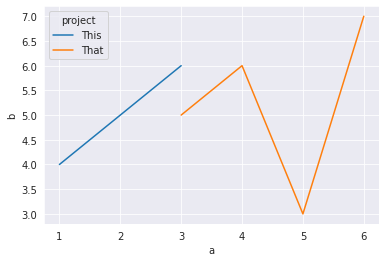

In [54]:
fig, ax2 = plt.subplots(1,1)
dat = {"a": [1,2,3], "b": [4,5,6]}
dat2 = {"a": [3,4,5,6], "b": [5,6,3,7]}
dat = pd.DataFrame(dat)
dat["project"] = "This"
dat2 = pd.DataFrame(dat2)
dat2["project"] = "That"
tot = pd.concat([dat, dat2], ignore_index=True)
sns.lineplot(x="a", y="b", data=tot, ax=ax2, hue="project")

In [68]:
fpr = dict()

In [69]:
fpr.update({"hetero": {"a": []}})
fpr.update({"homo": []})

In [72]:
fpr["hetero"]["a"]

[]

In [64]:
x = []
x.append(dat)

In [65]:
x

[   a  b project
 0  1  4    This
 1  2  5    This
 2  3  6    This]

In [6]:
prediction = pd.read_csv(f"../models/pbmc_hvg_500/prediction.csv", index_col=0)
prediction = prediction.drop("prediction", axis=1)
labels = pd.read_csv(f"../models/pbmc_hvg_500/test_set.csv", index_col=0)["cell_type"]


In [5]:
classes = ["singlet", "hetero"]
c1 = classes[0]
c2 = classes[1]

In [8]:
aux = prediction.copy(deep=True)
aux["class"] = labels
aux = aux[(aux["class"] == c1) | (aux["class"] == c2)]

In [12]:
aux

,hetero,homo,singlet,class
0,0.031,0.261,0.708,singlet
8,0.045,0.304,0.650,singlet
10,0.006,0.043,0.951,singlet
12,0.012,0.036,0.952,singlet
16,0.004,0.030,0.966,singlet
...,...,...,...,...
3625,0.002,0.002,0.996,singlet
3635,0.011,0.051,0.938,singlet
3636,0.034,0.134,0.832,singlet
3640,0.007,0.037,0.956,singlet


In [19]:
t_name = ["t0.0", "t0.3", "t0.5", "t0.8", "t1.0"]
t = [0, 0.3, 0.5, 0.8, 1.0]
thresholds = dict(zip(t_name, t))
for t in thresholds.keys():
    aux[t] = [1 if y >= thresholds[t] else 0 for y in aux["singlet"]]
aux["labels"] = [1 if y == "singlet" else 0 for y in aux["class"]]

In [31]:
aux

,hetero,homo,singlet,class,t0.0,t0.3,t0.5,t0.8,t1.0,labels
0,0.031,0.261,0.708,singlet,1,1,1,0,0,1
8,0.045,0.304,0.650,singlet,1,1,1,0,0,1
10,0.006,0.043,0.951,singlet,1,1,1,1,0,1
12,0.012,0.036,0.952,singlet,1,1,1,1,0,1
16,0.004,0.030,0.966,singlet,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3625,0.002,0.002,0.996,singlet,1,1,1,1,0,1
3635,0.011,0.051,0.938,singlet,1,1,1,1,0,1
3636,0.034,0.134,0.832,singlet,1,1,1,1,0,1
3640,0.007,0.037,0.956,singlet,1,1,1,1,0,1


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3653).

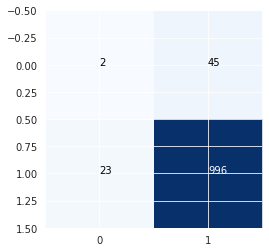

In [35]:
cnf_mat = confusion_matrix(y_true=aux["labels"], y_pred=aux["t0.5"])
plt.imshow(cnf_mat, cmap=plt.cm.Blues)
threshold = cnf_mat.max() / 2
for i in range(cnf_mat.shape[0]):
    for j in range(cnf_mat.shape[1]):
        plt.text(j, i, cnf_mat[i,j], color="w" if cnf_mat[i, j] > threshold else "black")
tick_marks = np.arange(len(np.unique(aux["labels"])))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.colorbar()
plt.tight_layout()

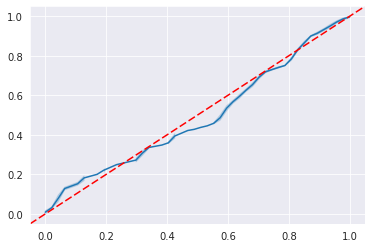

In [42]:
FPR, TPR, T = roc_curve(aux['labels'], aux['singlet'])
g = sns.lineplot(x=FPR, y=TPR)
g.axline(xy1=(0,0), slope=1, color="r", dashes=(5,2))

In [52]:
x = dict(zip(T, zip(FPR, TPR)))
x

{2.0: (0.0, 0.0),
 1.0: (0.0, 0.009813542688910697),
 0.999: (0.0, 0.016683022571148183),
 0.998: (0.02127659574468085, 0.02747791952894995),
 0.997: (0.02127659574468085, 0.03532875368007851),
 0.996: (0.0425531914893617, 0.052011776251226695),
 0.995: (0.0425531914893617, 0.05691854759568204),
 0.994: (0.0425531914893617, 0.06967615309126594),
 0.993: (0.0425531914893617, 0.0873405299313052),
 0.992: (0.0425531914893617, 0.09911678115799803),
 0.991: (0.0425531914893617, 0.1069676153091266),
 0.99: (0.06382978723404255, 0.12168792934249265),
 0.989: (0.06382978723404255, 0.13542688910696762),
 0.988: (0.10638297872340426, 0.1452404317958783),
 0.987: (0.10638297872340426, 0.15996074582924436),
 0.986: (0.1276595744680851, 0.16879293424926398),
 0.985: (0.1276595744680851, 0.18547595682041218),
 0.984: (0.1276595744680851, 0.19234543670264967),
 0.983: (0.1702127659574468, 0.20019627085377822),
 0.982: (0.19148936170212766, 0.20510304219823355),
 0.981: (0.19148936170212766, 0.2158979

In [ ]:
fig = plt.figure()


yannick data

In [3]:
labels = pd.read_csv("../data/processed/yannick_labels.csv")

In [ ]:
labels_new = []

In [15]:
(labels.iloc[1, :] == 1)

0    False
1    False
2     True
Name: 1, dtype: bool

In [17]:
dt = pd.DataFrame({"a": [1,2,3],
                   "b": [0,3,1]})

In [18]:
dt.idxmax(axis=1)

0    a
1    b
2    a
dtype: object